<a href="https://colab.research.google.com/github/Jamee95/ubran_sound_classification/blob/code/Urban_Sound_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Step 11: Define Evaluation Helper Function**
We’ll create a helper function to:
- Measure **training time**
- Predict on test data
- Compute metrics: accuracy, precision, recall, F1-score
- Display **classification report**, **confusion matrix**, and **ROC curve**


In [ ]:
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    print(f"\n Training {model_name}...")
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    start_pred = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_pred

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    print(f"\n Classification Report for {model_name}:\n")
    print(report)
    print(f" Accuracy: {acc:.4f}")
    print(f" Training Time: {train_time:.2f}s | Prediction Time: {pred_time:.2f}s")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # ROC Curve (one-vs-rest)
    y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
    y_pred_bin = label_binarize(y_pred, classes=np.arange(len(le.classes_)))
    try:
        roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro')
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.title(f"ROC Curve - {model_name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()
    except Exception as e:
        print("ROC computation skipped:", e)

    return {"model": model_name, "accuracy": acc, "train_time": train_time, "pred_time": pred_time}

# **Step 12: Train Random Forest Classifier**
Random Forest is a strong baseline model for tabular features like MFCCs.  
We’ll train it on the extracted features and evaluate performance.



 Training Random Forest...

 Classification Report for Random Forest:

                  precision    recall  f1-score   support

 air_conditioner       0.97      0.96      0.97       200
        car_horn       0.99      0.79      0.88        86
children_playing       0.83      0.90      0.86       200
        dog_bark       0.82      0.85      0.84       200
        drilling       0.91      0.93      0.92       200
   engine_idling       0.96      0.96      0.96       200
        gun_shot       0.96      0.67      0.79        75
      jackhammer       0.94      0.95      0.95       200
           siren       0.95      0.96      0.95       186
    street_music       0.83      0.87      0.85       200

        accuracy                           0.90      1747
       macro avg       0.92      0.88      0.90      1747
    weighted avg       0.91      0.90      0.90      1747

 Accuracy: 0.9044
 Training Time: 17.73s | Prediction Time: 0.11s


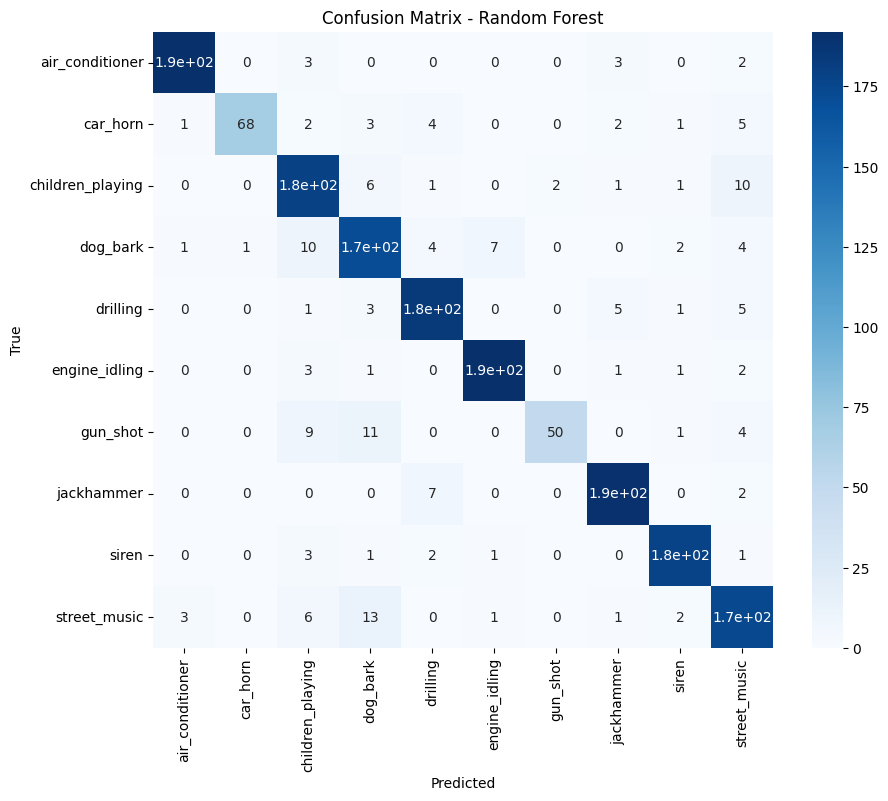

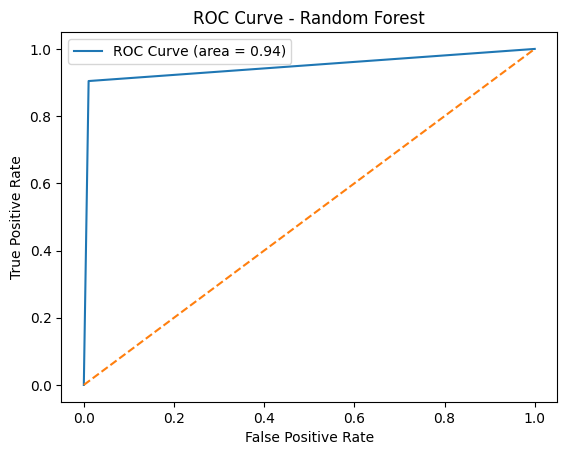

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_results = evaluate_model(rf, X_train, X_test, y_train, y_test, "Random Forest")

#  **Step 13: Train Support Vector Machine (SVM)**
SVM is a robust classifier for high-dimensional spaces (like MFCC features).  
We’ll use the RBF kernel for non-linear classification.



 Training Support Vector Machine...

 Classification Report for Support Vector Machine:

                  precision    recall  f1-score   support

 air_conditioner       0.61      0.80      0.69       200
        car_horn       0.96      0.51      0.67        86
children_playing       0.62      0.62      0.62       200
        dog_bark       0.66      0.69      0.67       200
        drilling       0.70      0.67      0.68       200
   engine_idling       0.77      0.73      0.75       200
        gun_shot       0.82      0.31      0.45        75
      jackhammer       0.73      0.83      0.78       200
           siren       0.88      0.80      0.83       186
    street_music       0.55      0.62      0.59       200

        accuracy                           0.69      1747
       macro avg       0.73      0.66      0.67      1747
    weighted avg       0.71      0.69      0.69      1747

 Accuracy: 0.6920
 Training Time: 26.12s | Prediction Time: 1.29s


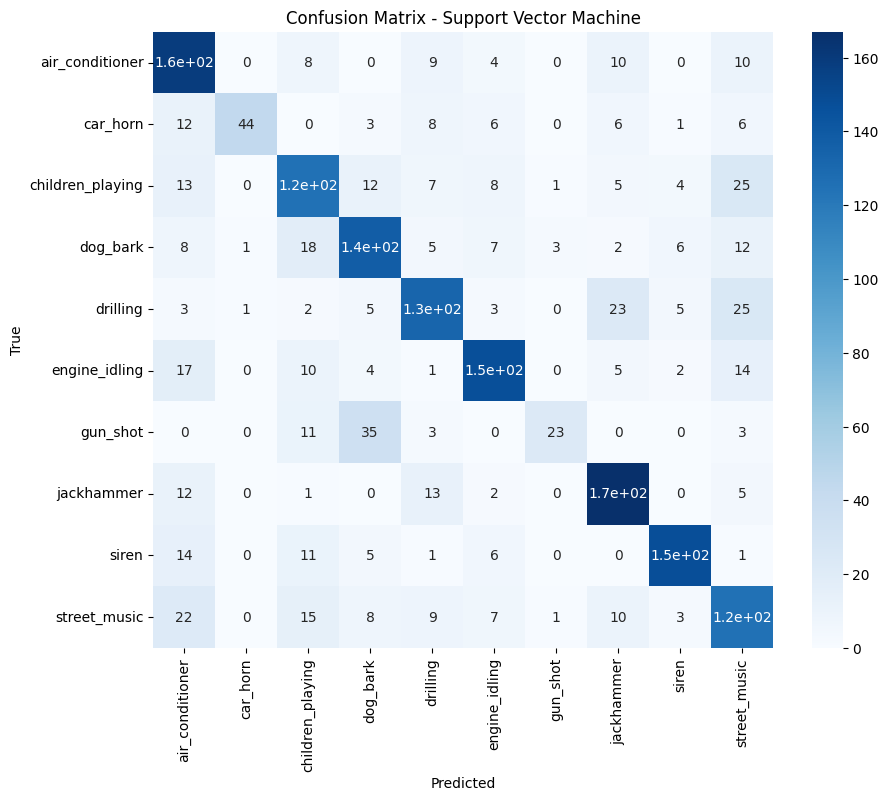

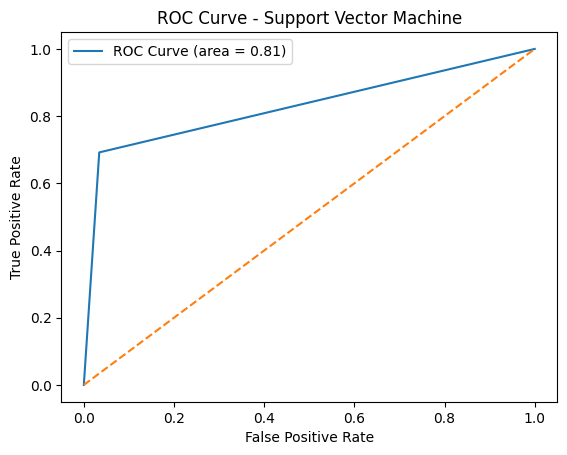

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', gamma='scale', C=5, probability=True)
svm_results = evaluate_model(svm, X_train, X_test, y_train, y_test, "Support Vector Machine")


#  **Step 14: Train MLP Neural Network**
We’ll use a simple **Multi-Layer Perceptron (MLP)** classifier as a lightweight neural baseline.  
It can model non-linear relationships between MFCC features.



 Training MLP Neural Network...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 Classification Report for MLP Neural Network:

                  precision    recall  f1-score   support

 air_conditioner       0.94      0.92      0.93       200
        car_horn       0.96      0.84      0.89        86
children_playing       0.86      0.75      0.80       200
        dog_bark       0.90      0.83      0.87       200
        drilling       0.88      0.88      0.88       200
   engine_idling       0.97      0.94      0.95       200
        gun_shot       0.85      0.76      0.80        75
      jackhammer       0.91      0.90      0.91       200
           siren       0.93      0.94      0.93       186
    street_music       0.64      0.87      0.74       200

        accuracy                           0.87      1747
       macro avg       0.88      0.86      0.87      1747
    weighted avg       0.88      0.87      0.87      1747

 Accuracy: 0.8701
 Training Time: 40.81s | Prediction Time: 0.02s


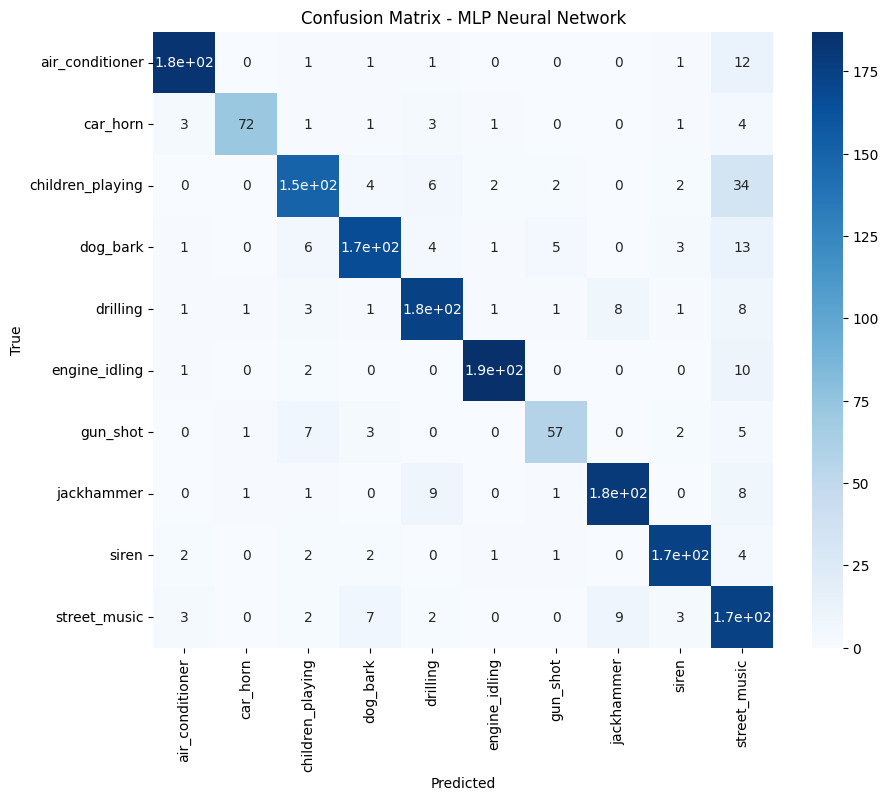

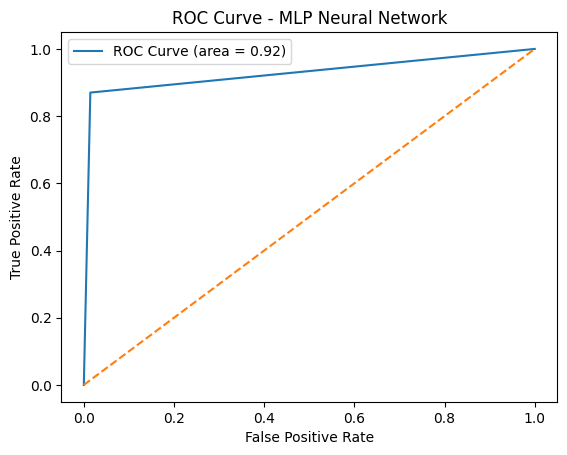

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(256,128), activation='relu', solver='adam', max_iter=100, random_state=42)
mlp_results = evaluate_model(mlp, X_train, X_test, y_train, y_test, "MLP Neural Network")


#  **Step 15: Compare Model Performances**
We’ll summarize all models’ accuracy, training time, and prediction time  
in a single comparison table for easy interpretation.


,model,accuracy,train_time,pred_time
0,Random Forest,0.904408,17.725199,0.112971
1,MLP Neural Network,0.870063,40.813268,0.019411
2,Support Vector Machine,0.692044,26.120341,1.289592


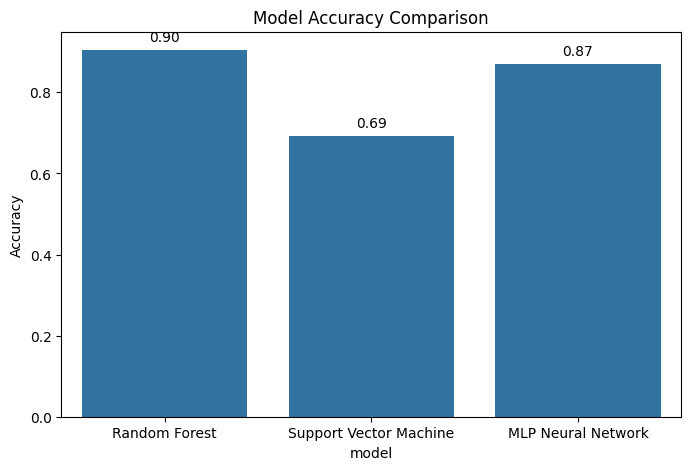

In [ ]:
results_df = pd.DataFrame([rf_results, svm_results, mlp_results])
display(results_df.sort_values(by='accuracy', ascending=False).reset_index(drop=True))

plt.figure(figsize=(8,5))
ax = sns.barplot(x='model', y='accuracy', data=results_df)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

#  **Step 16: Apply K-Fold Cross-Validation**
To make our evaluation statistically reliable, we’ll apply **5-Fold Cross-Validation**.

- The dataset will be split into 5 equal folds.  
- Each fold will act as a test set once, while the other 4 folds are used for training.  
- We’ll repeat this for all models (Random Forest, SVM, MLP).  

We’ll track **accuracy**, **precision**, **recall**, **F1-score**, and **training time** for each fold,  
then compute the **average performance** for every model.


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import time

# Custom scoring dictionary
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

def kfold_evaluate(model, X, y, model_name, n_splits=5):
    print(f"\n Performing {n_splits}-Fold Cross-Validation for {model_name}...")
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    all_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'train_time': []}

    fold = 1
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        start = time.time()
        model.fit(X_train, y_train)
        train_time = time.time() - start
        y_pred = model.predict(X_test)

        all_results['accuracy'].append(accuracy_score(y_test, y_pred))
        all_results['precision'].append(precision_score(y_test, y_pred, average='macro', zero_division=0))
        all_results['recall'].append(recall_score(y_test, y_pred, average='macro', zero_division=0))
        all_results['f1'].append(f1_score(y_test, y_pred, average='macro', zero_division=0))
        all_results['train_time'].append(train_time)

        print(f"Fold {fold}: acc={all_results['accuracy'][-1]:.3f}, f1={all_results['f1'][-1]:.3f}, time={train_time:.2f}s")
        fold += 1

    # Average results
    results = {
        "Model": model_name,
        "Accuracy": np.mean(all_results['accuracy']),
        "Precision": np.mean(all_results['precision']),
        "Recall": np.mean(all_results['recall']),
        "F1-Score": np.mean(all_results['f1']),
        "Avg Train Time (s)": np.mean(all_results['train_time'])
    }
    return results


# **Step 17: Evaluate All Models with 5-Fold CV**
We’ll perform K-Fold evaluation for:
1. Random Forest  
2. Support Vector Machine  
3. MLP Neural Network  
and then compare their average metrics side by side.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models = [
    ("Random Forest", RandomForestClassifier(n_estimators=200, random_state=42)),
    ("Support Vector Machine", SVC(kernel='rbf', gamma='scale', C=5)),
    ("MLP Neural Network", MLPClassifier(hidden_layer_sizes=(256,128), activation='relu', solver='adam', max_iter=100, random_state=42))
]

kfold_results = []
for name, model in models:
    res = kfold_evaluate(model, X, y_encoded, name)
    kfold_results.append(res)

results_kf_df = pd.DataFrame(kfold_results)
display(results_kf_df)



 Performing 5-Fold Cross-Validation for Random Forest...
Fold 1: acc=0.917, f1=0.912, time=15.86s
Fold 2: acc=0.919, f1=0.914, time=20.87s
Fold 3: acc=0.904, f1=0.899, time=15.71s
Fold 4: acc=0.911, f1=0.903, time=14.91s
Fold 5: acc=0.915, f1=0.911, time=15.58s

 Performing 5-Fold Cross-Validation for Support Vector Machine...
Fold 1: acc=0.696, f1=0.683, time=2.43s
Fold 2: acc=0.696, f1=0.672, time=2.05s
Fold 3: acc=0.682, f1=0.670, time=2.04s
Fold 4: acc=0.698, f1=0.686, time=2.42s
Fold 5: acc=0.697, f1=0.689, time=2.18s

 Performing 5-Fold Cross-Validation for MLP Neural Network...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 1: acc=0.898, f1=0.894, time=24.48s
Fold 2: acc=0.898, f1=0.891, time=16.98s


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 3: acc=0.890, f1=0.877, time=26.60s


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 4: acc=0.905, f1=0.896, time=23.75s
Fold 5: acc=0.887, f1=0.883, time=24.79s


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1-Score,Avg Train Time (s)
0,Random Forest,0.913192,0.924178,0.897592,0.907848,16.586232
1,Support Vector Machine,0.693655,0.731672,0.666291,0.679915,2.227119
2,MLP Neural Network,0.895671,0.898545,0.884534,0.888433,23.318354


# **Step 18: Visualize Cross-Validation Results**
Now we’ll visualize the mean performance metrics of each model across all folds.


/tmp/ipython-input-2648459410.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_kf_df, palette="viridis")


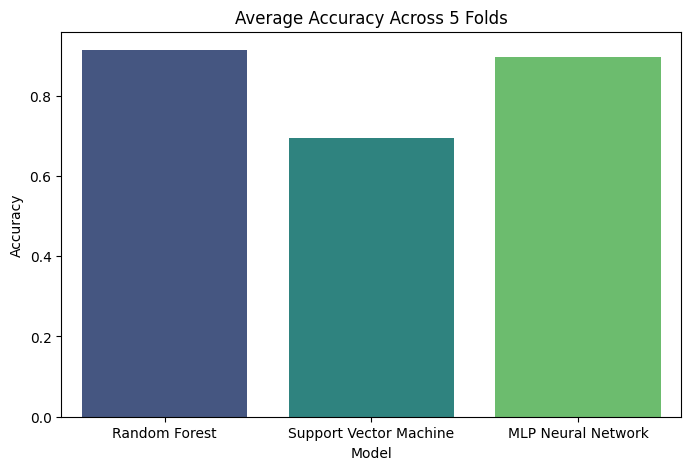

/tmp/ipython-input-2648459410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1-Score", data=results_kf_df, palette="mako")


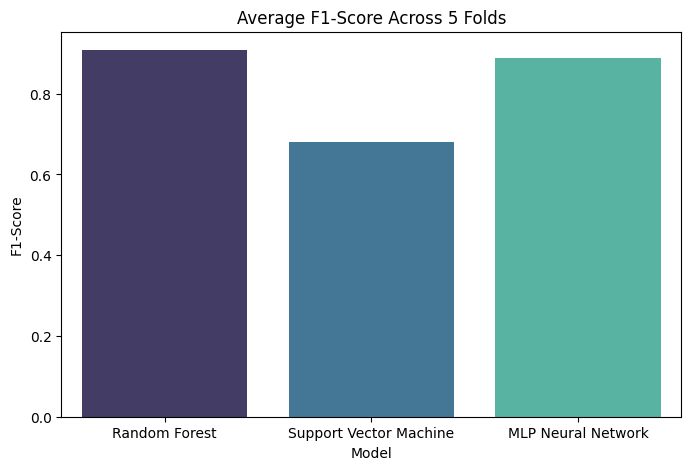

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=results_kf_df, palette="viridis")
plt.title("Average Accuracy Across 5 Folds")
plt.ylabel("Accuracy")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="F1-Score", data=results_kf_df, palette="mako")
plt.title("Average F1-Score Across 5 Folds")
plt.ylabel("F1-Score")
plt.show()


#  **Step 20: Statistical Significance Testing with Paired T-Test**

Now that we know **Random Forest** performed best,  
we’ll apply a **paired t-test** to check if its higher accuracy or F1-score  
is *statistically significant* compared to **SVM** and **MLP Neural Network**.

###  Why T-Test?
The **paired t-test** compares two related samples (e.g., model accuracies per fold):
- **Null Hypothesis (H₀):** There is *no significant difference* between the two models.
- **Alternative Hypothesis (H₁):** There *is a significant difference*.

We’ll use:
- `scipy.stats.ttest_rel` for paired comparison  
- p-value < 0.05 ⇒ reject H₀ (significant difference)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from scipy.stats import ttest_rel
import numpy as np

# Store per-fold results for each model
rf_scores, svm_scores, mlp_scores = [], [], []

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Performing 5-Fold evaluation again to collect per-fold results...")

for train_idx, test_idx in kf.split(X, y_encoded):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    # Train models
    rf = RandomForestClassifier(n_estimators=200, random_state=42)
    svm = SVC(kernel='rbf', gamma='scale', C=5)
    mlp = MLPClassifier(hidden_layer_sizes=(256,128), activation='relu', solver='adam', max_iter=100, random_state=42)

    rf.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    mlp.fit(X_train, y_train)

    # Predict
    rf_pred = rf.predict(X_test)
    svm_pred = svm.predict(X_test)
    mlp_pred = mlp.predict(X_test)

    # Store fold accuracies
    rf_scores.append(accuracy_score(y_test, rf_pred))
    svm_scores.append(accuracy_score(y_test, svm_pred))
    mlp_scores.append(accuracy_score(y_test, mlp_pred))


Performing 5-Fold evaluation again to collect per-fold results...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


# **Step 21: Perform Paired T-Tests**

We’ll run **paired t-tests** between Random Forest and:
1. SVM  
2. MLP  

We’ll compare their fold-wise accuracies.
If the **p-value < 0.05**, we reject the null hypothesis —  
meaning Random Forest’s improvement is **statistically significant**.


In [ ]:
from scipy.stats import ttest_rel

# Random Forest vs SVM
t_stat_svm, p_val_svm = ttest_rel(rf_scores, svm_scores)

# Random Forest vs MLP
t_stat_mlp, p_val_mlp = ttest_rel(rf_scores, mlp_scores)

print(" Paired T-Test Results (Random Forest vs Others):")
print(f"\nRandom Forest vs SVM -> t-statistic = {t_stat_svm:.4f}, p-value = {p_val_svm:.4f}")
print(f"Random Forest vs MLP -> t-statistic = {t_stat_mlp:.4f}, p-value = {p_val_mlp:.4f}")

if p_val_svm < 0.05:
    print("RF vs SVM difference is statistically significant.")
else:
    print(" RF vs SVM difference is NOT statistically significant.")

if p_val_mlp < 0.05:
    print(" RF vs MLP difference is statistically significant.")
else:
    print(" RF vs MLP difference is NOT statistically significant.")


 Paired T-Test Results (Random Forest vs Others):

Random Forest vs SVM -> t-statistic = 125.3014, p-value = 0.0000
Random Forest vs MLP -> t-statistic = 4.7465, p-value = 0.0090
RF vs SVM difference is statistically significant.
 RF vs MLP difference is statistically significant.


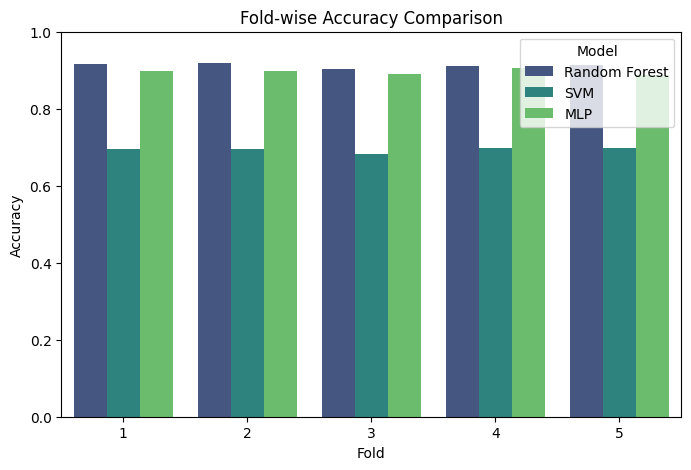

   Fold  Random Forest       SVM       MLP
0     1       0.917001  0.696050  0.898111
1     2       0.919290  0.696050  0.897539
2     3       0.903780  0.681558  0.890034
3     4       0.911226  0.697595  0.905498
4     5       0.914662  0.697022  0.887171


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

folds = np.arange(1, 6)
acc_df = pd.DataFrame({
    "Fold": folds,
    "Random Forest": rf_scores,
    "SVM": svm_scores,
    "MLP": mlp_scores
})

acc_melted = acc_df.melt(id_vars="Fold", var_name="Model", value_name="Accuracy")

plt.figure(figsize=(8,5))
sns.barplot(x="Fold", y="Accuracy", hue="Model", data=acc_melted, palette="viridis")
plt.title("Fold-wise Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

print(acc_df)
